<h1>Importing the Data</h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
train_url="https://drive.google.com/uc?export=download&id=1DdyFZ9fizNFyinCvnW3npY7S43bkzD63"
test_url="https://drive.google.com/uc?export=download&id=1vii5mpTPPrSExmg5S0eVcL4cmdLi-F9L"
train_set=pd.read_csv(train_url)
test_set=pd.read_csv(test_url)
test_set.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75


<h1>Dapa Preparation</h1>

In [6]:
df=train_set.copy()
def process_data(df):
    object_value_columns=["Mileage","Engine","Power"]
    object_columns=["Transmission","Owner_Type","Location","Fuel_Type","Brand"]
    df.drop('Unnamed: 0',axis=1,inplace=True)
    for i in object_value_columns:
        df[i]=df[i].str.extract(r"([0-9]*\.?[0-9]+)").astype(np.float64)
    df["Brand"]=df["Name"].str.extract(r"(^[A-Za-z]+)")
    df.drop("Name",axis=1,inplace=True)
    df=pd.get_dummies(df,columns=object_columns,drop_first=True)
    return df
p_df=process_data(df)
p_df.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2017,16500,23.84,1199.0,84.00,5.0,5.00,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,2017,47357,18.49,1493.0,100.00,7.0,8.37,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2014,35000,15.00,1598.0,103.52,5.0,4.50,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,2007,200000,17.20,1396.0,53.50,5.0,0.85,True,False,True,...,False,False,False,False,False,False,True,False,False,False
4,2013,64000,21.02,1248.0,88.76,5.0,2.65,True,False,True,...,False,False,False,False,False,False,True,False,False,False


<h1>Data Analysis</h1>

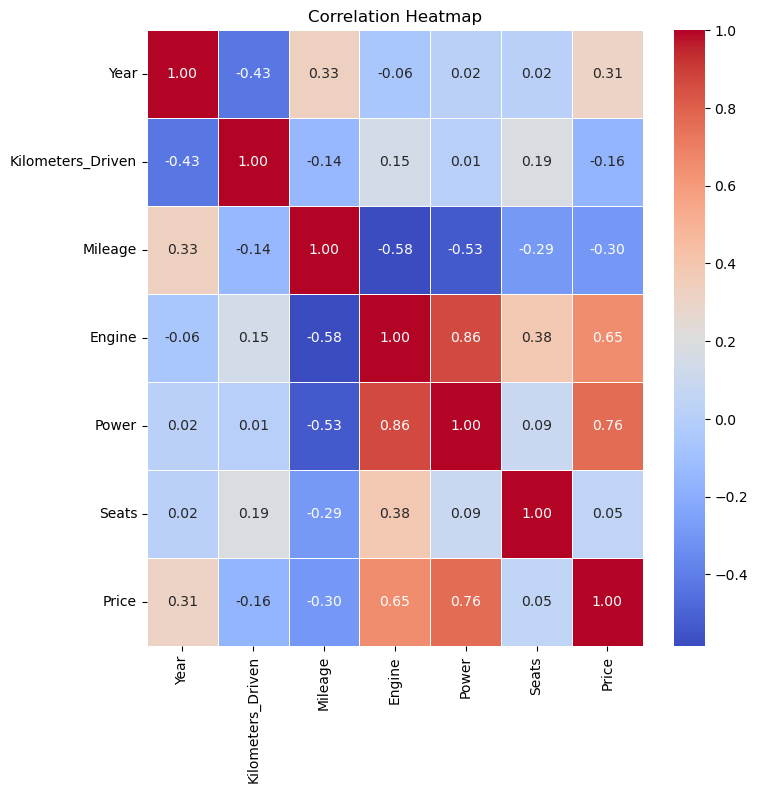

In [8]:
corr_matrix=p_df.iloc[:,0:7].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,linewidth=0.5,fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

<p>We will be dropping Seats because it's effectively useless</p>

In [10]:
p_df.drop(['Seats'],axis=1,inplace=True)

<h1>Z-Score Normalisation</h1>

In [12]:
def normalise(df):
    mean=np.mean(df,axis=0)
    std_dev=np.std(df,axis=0)
    return(df-mean)/std_dev
n_df=pd.concat([normalise(p_df.iloc[:,0:7]),p_df.iloc[:,7:]],axis=1)
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       3750 non-null   float64
 1   Kilometers_Driven          3750 non-null   float64
 2   Mileage                    3749 non-null   float64
 3   Engine                     3722 non-null   float64
 4   Power                      3652 non-null   float64
 5   Price                      3750 non-null   float64
 6   Transmission_Manual        3750 non-null   float64
 7   Owner_Type_Fourth & Above  3750 non-null   bool   
 8   Owner_Type_Second          3750 non-null   bool   
 9   Owner_Type_Third           3750 non-null   bool   
 10  Location_Bangalore         3750 non-null   bool   
 11  Location_Chennai           3750 non-null   bool   
 12  Location_Coimbatore        3750 non-null   bool   
 13  Location_Delhi             3750 non-null   bool 

<h1>Dropping Null Rows</h1>

In [14]:
final_df=n_df.dropna(how='any')
final_df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,Transmission_Manual
count,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000,3651.000000
mean,0.039024,-0.011747,0.032857,0.009329,0.000367,0.011998,-0.009342
std,0.967614,0.999516,0.950297,1.001334,1.000028,1.006068,1.004478
min,-4.691851,-1.416232,-3.989427,-1.658684,-1.464170,-0.808349,-1.575403
25%,-0.402392,-0.607478,-0.608402,-0.704606,-0.693813,-0.530827,-1.575403
50%,0.210388,-0.142068,0.030653,-0.209283,-0.276636,-0.334510,0.634758
75%,0.823168,0.361086,0.668603,0.613485,0.452040,0.044740,0.634758
max,1.742337,17.771346,2.290566,6.381170,8.048643,13.430018,0.634758


In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3651 entries, 0 to 3749
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       3651 non-null   float64
 1   Kilometers_Driven          3651 non-null   float64
 2   Mileage                    3651 non-null   float64
 3   Engine                     3651 non-null   float64
 4   Power                      3651 non-null   float64
 5   Price                      3651 non-null   float64
 6   Transmission_Manual        3651 non-null   float64
 7   Owner_Type_Fourth & Above  3651 non-null   bool   
 8   Owner_Type_Second          3651 non-null   bool   
 9   Owner_Type_Third           3651 non-null   bool   
 10  Location_Bangalore         3651 non-null   bool   
 11  Location_Chennai           3651 non-null   bool   
 12  Location_Coimbatore        3651 non-null   bool   
 13  Location_Delhi             3651 non-null   bool   
 1

<h1>Model Development</h1>

In [17]:
def eval_metrics(predictions,targets):
    predictions=predictions.squeeze() #Why is squeeze necessary here
    targets=targets.squeeze()
    mse=np.mean(np.square(targets-predictions))
    rmse=np.sqrt(mse)
    res_sum=np.sum(np.square(targets-predictions),axis=0)
    mean=np.mean(targets)
    total_sum=np.sum(np.square(targets-mean),axis=0)
    r2_score=1-res_sum/total_sum
    return mse,rmse,r2_score

<h5>Batch gradient descent is generally preferable for datasets with limited number of features like this one. But, we will be using stochastic gradient descent.</h5>

In [19]:
cost_function=dict()
X_train=final_df.drop("Price",axis=1)
Y_train=final_df["Price"]
epoch=100
alpha=0.01
theta=np.random.randn(48,1)
def CostFunction(X,Y,theta):
    predictions=X.dot(theta)
    Y=Y.squeeze()
    predictions=predictions.squeeze()
    cost=0.5*np.mean(np.square(predictions-Y))
    return cost
def Gradient(X,Y,theta):
    gradient=X.T.dot(X.dot(theta)-Y)
    return gradient
def alpha_anneal(alpha):
    alpha=alpha*0.95
    return alpha
for i in range(epoch):
    for j in range(3651):
        x=np.random.randint(0,3651)
        theta=theta-alpha*Gradient(np.full((1,48),X_train.iloc[x,:]),Y_train.iloc[x],theta)
    alpha=alpha_anneal(alpha)
    cost_function[i]=CostFunction(X_train,Y_train,theta)
    mse,rmse,r2=eval_metrics(X_train.dot(theta),Y_train)
    print(f"Epoch: {i}, \nCost Function: {cost_function[i]} MSE: {mse} RMSE: {rmse} R2: {r2}")

Epoch: 0, 
Cost Function: 0.17537367748132232 MSE: 0.35074735496264464 RMSE: 0.5922392717159549 R2: 0.6533757545016387
Epoch: 1, 
Cost Function: 0.1950480193588869 MSE: 0.3900960387177738 RMSE: 0.6245766876195219 R2: 0.6144896228601673
Epoch: 2, 
Cost Function: 0.14027003697978582 MSE: 0.28054007395957165 RMSE: 0.5296603382919771 R2: 0.7227577340429339
Epoch: 3, 
Cost Function: 0.13040639242705432 MSE: 0.26081278485410864 RMSE: 0.5106983305769744 R2: 0.7422531246856869
Epoch: 4, 
Cost Function: 0.13542355538036246 MSE: 0.27084711076072493 RMSE: 0.5204297366222697 R2: 0.7323367544058998
Epoch: 5, 
Cost Function: 0.12417495990418659 MSE: 0.24834991980837318 RMSE: 0.49834718802093503 R2: 0.754569486112521
Epoch: 6, 
Cost Function: 0.13379988449712815 MSE: 0.2675997689942563 RMSE: 0.5173004629751033 R2: 0.7355459229819462
Epoch: 7, 
Cost Function: 0.12420739746161126 MSE: 0.24841479492322252 RMSE: 0.4984122740495287 R2: 0.7545053736183907
Epoch: 8, 
Cost Function: 0.1267684602601692 MSE: 0

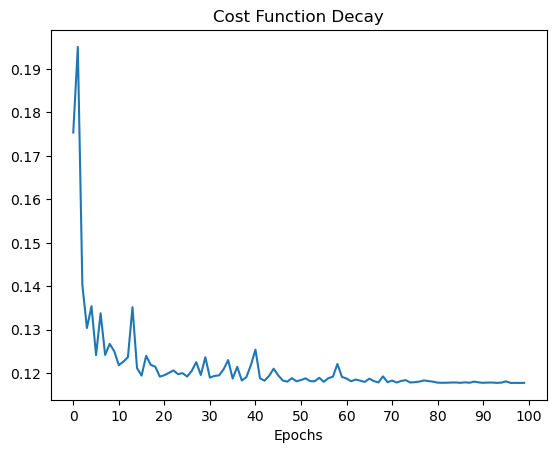

In [20]:
plt.plot(cost_function.keys(),cost_function.values())
plt.title("Cost Function Decay")
plt.xlabel("Epochs")
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
print(end="")

In [21]:
print(theta)

[[0.28936422047115606]
 [-0.06891468170770992]
 [-0.04012146394804628]
 [0.10782112557100394]
 [0.4058453716713484]
 [0.005733620447596983]
 [0.37638455419181777]
 [-0.05615252302563777]
 [0.021346454133113233]
 [0.3359050013797878]
 [0.29870512805971866]
 [0.34430132847757655]
 [0.11161922109250122]
 [0.36123414452772507]
 [0.268634790050907]
 [0.1987897406703312]
 [0.07331340402175505]
 [0.10377511617673942]
 [0.21800436571247453]
 [-0.8606214278921069]
 [-0.09494108848164597]
 [0.4463309066528977]
 [0.33972419445560353]
 [-0.35931493727783026]
 [-0.3607272177043298]
 [-0.4266124170765664]
 [-0.562221235049799]
 [-0.30543502856884713]
 [-0.4030041955657221]
 [-0.3387357975637159]
 [-0.45220543784374184]
 [0.7184041525332837]
 [-0.4409182858139656]
 [1.5655408854962654]
 [-0.5473949613980609]
 [-0.22087795016277492]
 [0.5857809417645535]
 [0.9583587079924736]
 [-0.24338095937005227]
 [-0.3647143682735954]
 [1.146750450059312]
 [-0.3854754653558787]
 [-0.33840216647364024]
 [-0.8309616

In [104]:
test_set.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Swift Dzire VDI,Hyderabad,2013,84175,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,6.95
1,1,Hyundai i10 Sportz AT,Delhi,2012,62282,Petrol,Automatic,First,16.95 kmpl,1197 CC,78.9 bhp,5.0,2.90
2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,37460,Petrol,Manual,First,18.6 kmpl,1197 CC,81.86 bhp,5.0,6.28
3,3,Volvo XC60 D5,Pune,2011,106976,Diesel,Automatic,First,13.5 kmpl,2400 CC,215 bhp,5.0,13.80
4,4,Hyundai i10 Magna 1.2,Delhi,2013,60000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75


In [172]:
t_df=test_set.copy()
p_tdf=process_data(t_df)
print(p_tdf.info())
def test_normalise(df):
    mean=np.mean(df,axis=0)
    std_dev=np.std(df,axis=0)
    print("Mean",mean,"\nStd Dev",std_dev)
    return((df-mean)/std_dev)
n_tdf=pd.concat([test_normalise(p_tdf.iloc[:,0:7]),p_tdf.iloc[:,7:]],axis=1)
n_tdf.dropna(how='any',inplace=True)
n_tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1250 non-null   int64  
 1   Kilometers_Driven          1250 non-null   int64  
 2   Mileage                    1249 non-null   float64
 3   Engine                     1244 non-null   float64
 4   Power                      1225 non-null   float64
 5   Seats                      1243 non-null   float64
 6   Price                      1250 non-null   float64
 7   Transmission_Manual        1250 non-null   bool   
 8   Owner_Type_Fourth & Above  1250 non-null   bool   
 9   Owner_Type_Second          1250 non-null   bool   
 10  Owner_Type_Third           1250 non-null   bool   
 11  Location_Bangalore         1250 non-null   bool   
 12  Location_Chennai           1250 non-null   bool   
 13  Location_Coimbatore        1250 non-null   bool 

In [168]:
n_tdf.drop("Price",axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 0 to 1249
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1224 non-null   float64
 1   Kilometers_Driven          1224 non-null   float64
 2   Mileage                    1224 non-null   float64
 3   Engine                     1224 non-null   float64
 4   Power                      1224 non-null   float64
 5   Seats                      1224 non-null   float64
 6   Brand_Audi                 1224 non-null   bool   
 7   Brand_Force                1224 non-null   bool   
 8   Brand_Smart                1224 non-null   bool   
 9   Transmission_Manual        1224 non-null   bool   
 10  Owner_Type_Fourth & Above  1224 non-null   bool   
 11  Owner_Type_Second          1224 non-null   bool   
 12  Owner_Type_Third           1224 non-null   bool   
 13  Location_Bangalore         1224 non-null   bool   
 1

In [180]:
X_test=n_tdf.drop(["Price","Seats"],axis=1)
gar_list=list()
X_test["Brand_Audi"]=False #pos=21
X_test["Brand_Force"]=False#pos=26
X_test["Brand_Smart"]=False#pos=43
for gar in range(21):
    gar_list.append(gar)
gar_list.append(45)
for gar in range(21,25):
    gar_list.append(gar)
gar_list.append(46)
for gar in range(25,40):
    gar_list.append(gar)
gar_list.append(47)
for gar in range(40,45):
    gar_list.append(gar)
X_test=X_test.iloc[:,gar_list]
X_test.info()
Y_test=n_tdf["Price"]
predictions=X_test.dot(theta)
mse_test,rmse_test,r2_test=eval_metrics(predictions,Y_test)
print(mse_test,rmse_test,r2_test)

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 0 to 1249
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       1224 non-null   float64
 1   Kilometers_Driven          1224 non-null   float64
 2   Mileage                    1224 non-null   float64
 3   Engine                     1224 non-null   float64
 4   Power                      1224 non-null   float64
 5   Transmission_Manual        1224 non-null   bool   
 6   Owner_Type_Fourth & Above  1224 non-null   bool   
 7   Owner_Type_Second          1224 non-null   bool   
 8   Owner_Type_Third           1224 non-null   bool   
 9   Location_Bangalore         1224 non-null   bool   
 10  Location_Chennai           1224 non-null   bool   
 11  Location_Coimbatore        1224 non-null   bool   
 12  Location_Delhi             1224 non-null   bool   
 13  Location_Hyderabad         1224 non-null   bool   
 1

<h2>Therefore, the r_2 score turns out to be 74.207%.

In [216]:
for i in range(1250):
    print(f"Name: Price: {((Y_test.iloc[i]*11.134572)+9.77208):.5f} Predicted Price: {(predictions.iloc[i]*11.134572)+9.77208}")

Name: Price: 6.94987 Predicted Price: 0    5.903281
Name: 0, dtype: object
Name: Price: 2.89987 Predicted Price: 0    0.767581
Name: 1, dtype: object
Name: Price: 6.27987 Predicted Price: 0    6.994148
Name: 2, dtype: object
Name: Price: 13.79987 Predicted Price: 0    19.594499
Name: 3, dtype: object
Name: Price: 2.74987 Predicted Price: 0    1.494993
Name: 4, dtype: object
Name: Price: 11.49987 Predicted Price: 0    15.828049
Name: 5, dtype: object
Name: Price: 5.09987 Predicted Price: 0    5.959469
Name: 6, dtype: object
Name: Price: 35.49987 Predicted Price: 0    26.771108
Name: 7, dtype: object
Name: Price: 50.49987 Predicted Price: 0    42.120924
Name: 8, dtype: object
Name: Price: 4.69987 Predicted Price: 0    4.942176
Name: 9, dtype: object
Name: Price: 2.59987 Predicted Price: 0    1.363286
Name: 10, dtype: object
Name: Price: 2.74987 Predicted Price: 0    1.618416
Name: 11, dtype: object
Name: Price: 7.21987 Predicted Price: 0    8.076421
Name: 12, dtype: object
Name: Price: 5

IndexError: single positional indexer is out-of-bounds